<a href="https://colab.research.google.com/github/mehran1373/analysis/blob/main/meh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:


# import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import chi2,SelectKBest,f_classif,_univariate_selection
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,mean_squared_error,mean_absolute_percentage_error

read data.csv

In [28]:
data=pd.read_csv('marketing_datane.csv')
data=data.rename(columns=str.lower)
data=data.rename(columns={' income ':'income'})
data['dt_customer']=pd.to_datetime(data['dt_customer']) 
data['income']=data['income'].str.replace('$','')
data['income']=data['income'].str.replace(',','')
data['income']=data['income'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


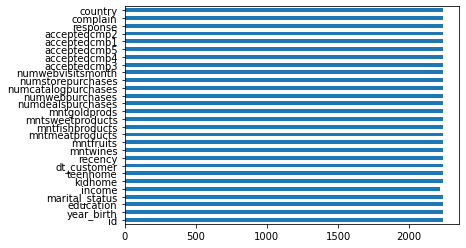

In [29]:

data.count().plot(kind='barh')# income variable has a null values

feature enginering

In [30]:
cat=data.select_dtypes(include='object')
num=data.select_dtypes(exclude=['object','datetime'])
data['year']=data['dt_customer'].dt.year
data['month']=data['dt_customer'].dt.month
data['day']=data['dt_customer'].dt.day
data['day_name']=data['dt_customer'].dt.day_name()
data['month_name']=data['dt_customer'].dt.month_name()

In [31]:
data=data.drop(['dt_customer','id'],axis=1)

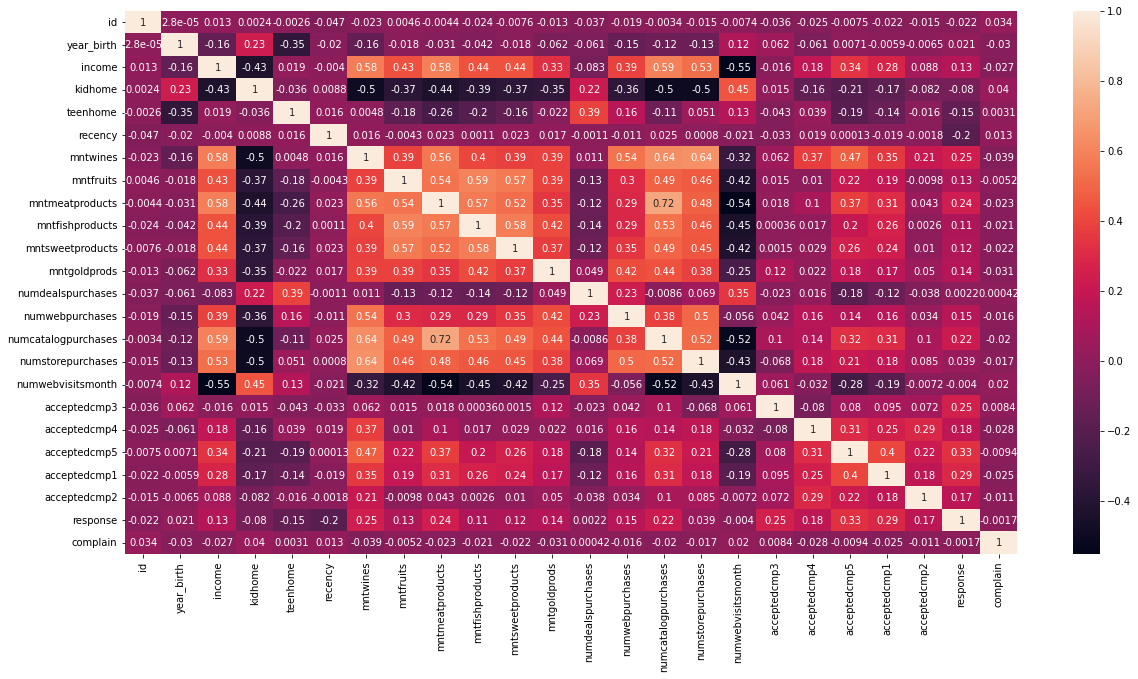

In [32]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(num.corr(),annot=True)

overview of **income**

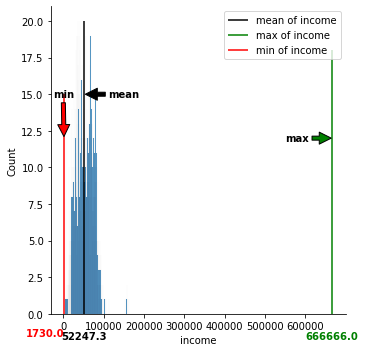

In [33]:
ax=sns.displot(data['income'],bins=2000,)
plt.vlines(x=data['income'].mean(),ymin=0,color='k',ymax=20,label='mean of income')
plt.text(x=data['income'].mean(),y=-1.5,color='k',s=round(data['income'].mean(),1),ha='center',va='center',fontweight='bold')
plt.annotate('mean',fontweight='bold',xy=(data['income'].mean(),15),xycoords='data',xytext=(150000,15),ha='center',va='center',arrowprops=dict(facecolor='black',shrink=0.04))
plt.vlines(x=data['income'].max(),ymin=0,ymax=18,label='max of income',color='green')
plt.annotate('max',fontweight='bold',xy=(data['income'].max(),12),xycoords='data',xytext=(580000,12),ha='center',va='center',arrowprops=dict(facecolor='green',shrink=0.04))
plt.text(x=data['income'].max(),y=-1.5,color='green',ha='center',fontweight='bold',va='center',s=round(data['income'].max(),1))
plt.vlines(x=data['income'].min(),ymin=0,ymax=15,color='red',label='min of income')
plt.text(x=data['income'].min(),y=-1.5,s=round(data['income'].min(),1),ha='right',color='red',fontweight='bold')
plt.annotate('min',xy=(data['income'].min(),12),xycoords='data',xytext=(10,15),ha='center',va='center',fontweight='bold',arrowprops=dict(facecolor='red',shrink=0.04))
plt.legend()


overview of **recency**

([<matplotlib.axis.XTick at 0x7fd2dc6573d0>,
 <a list of 20 Text major ticklabel objects>)

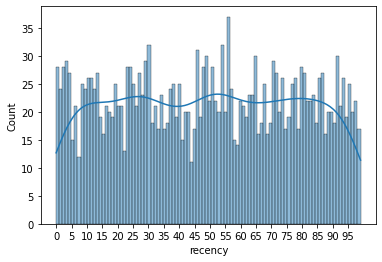

In [34]:
sns.histplot(data['recency'],bins=100,kde=True)
plt.xticks(ticks=range(0,100,5))

overview of **mount varieables**



In [35]:
mount=data.iloc[:,9:14]
for i in mount:
  print(i+':','\n',data[i].value_counts,2*'\n')


mntmeatproducts: 
 <bound method IndexOpsMixin.value_counts of 0       379
1        64
2        59
3         1
4        24
       ... 
2235    126
2236     13
2237     88
2238    701
2239    553
Name: mntmeatproducts, Length: 2240, dtype: int64> 


mntfishproducts: 
 <bound method IndexOpsMixin.value_counts of 0       111
1         7
2        15
3         0
4        11
       ... 
2235     47
2236      3
2237     15
2238    149
2239    188
Name: mntfishproducts, Length: 2240, dtype: int64> 


mntsweetproducts: 
 <bound method IndexOpsMixin.value_counts of 0       189
1         0
2         2
3         0
4         0
       ... 
2235     48
2236      8
2237      5
2238    165
2239      0
Name: mntsweetproducts, Length: 2240, dtype: int64> 


mntgoldprods: 
 <bound method IndexOpsMixin.value_counts of 0       218
1        37
2        30
3         0
4        34
       ... 
2235     78
2236     16
2237     14
2238     63
2239    144
Name: mntgoldprods, Length: 2240, dtype: int64> 


numdeals

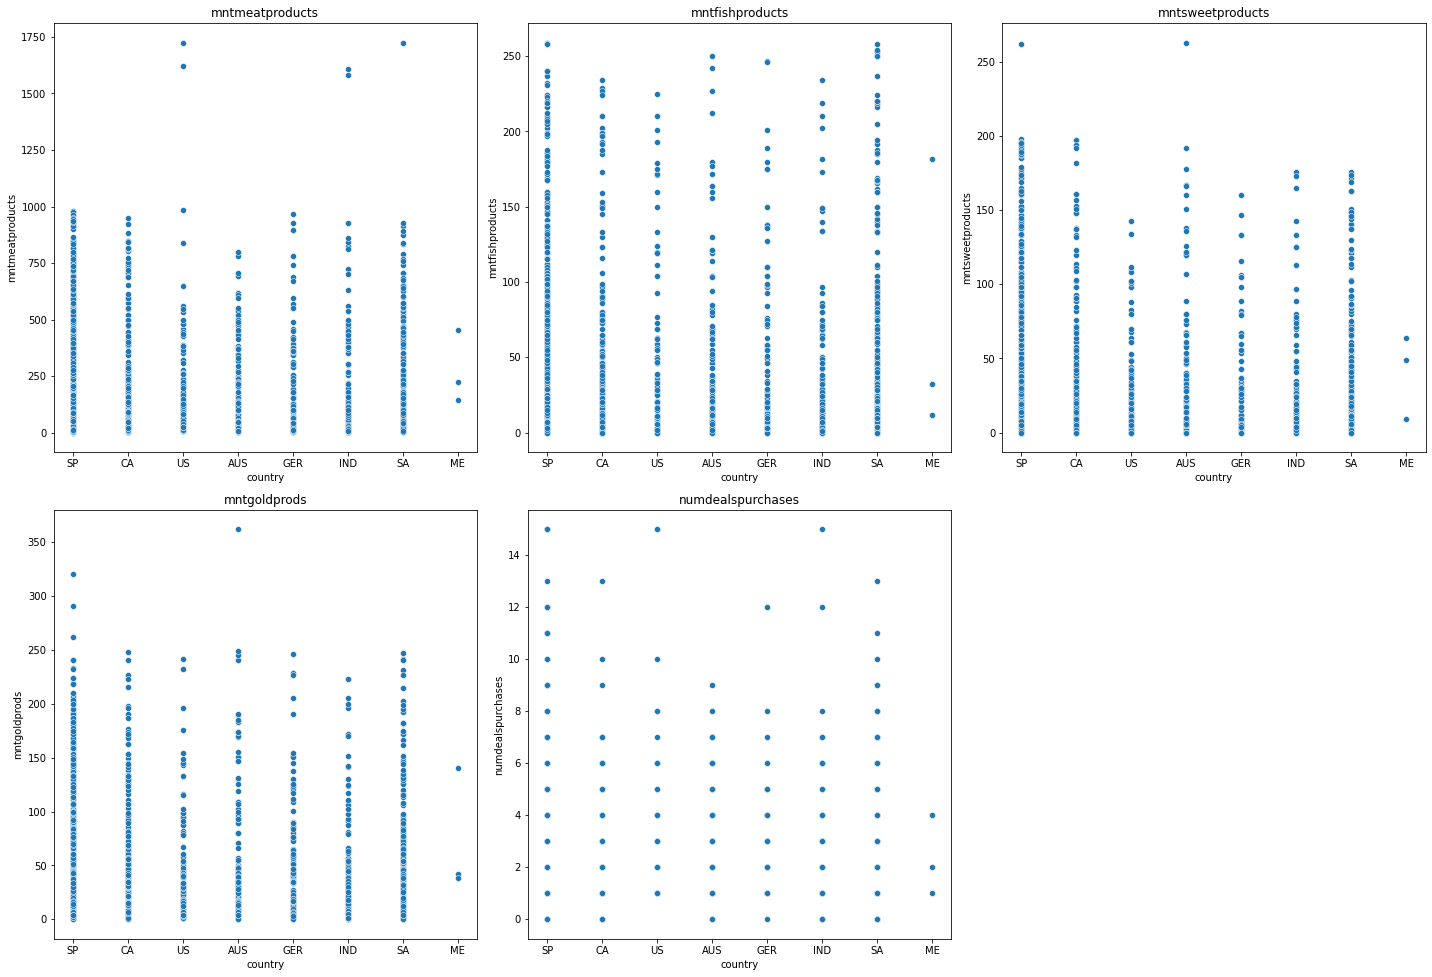

In [36]:
plt.figure(figsize=(20,20))
for i,j in enumerate(mount.columns):
  ax=plt.subplot(3,3,i+1)
  sns.scatterplot(y=j,x='country',data=data).set_title(j)
plt.tight_layout()


overview of **number variables**


In [37]:
number=data.iloc[:,15:18]
for i in number:
  print(i+':','\n',data[i].value_counts(),2*'\n')

numcatalogpurchases: 
 0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: numcatalogpurchases, dtype: int64 


numstorepurchases: 
 3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: numstorepurchases, dtype: int64 


numwebvisitsmonth: 
 7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
10      3
20      3
14      2
19      2
17      1
13      1
Name: numwebvisitsmonth, dtype: int64 




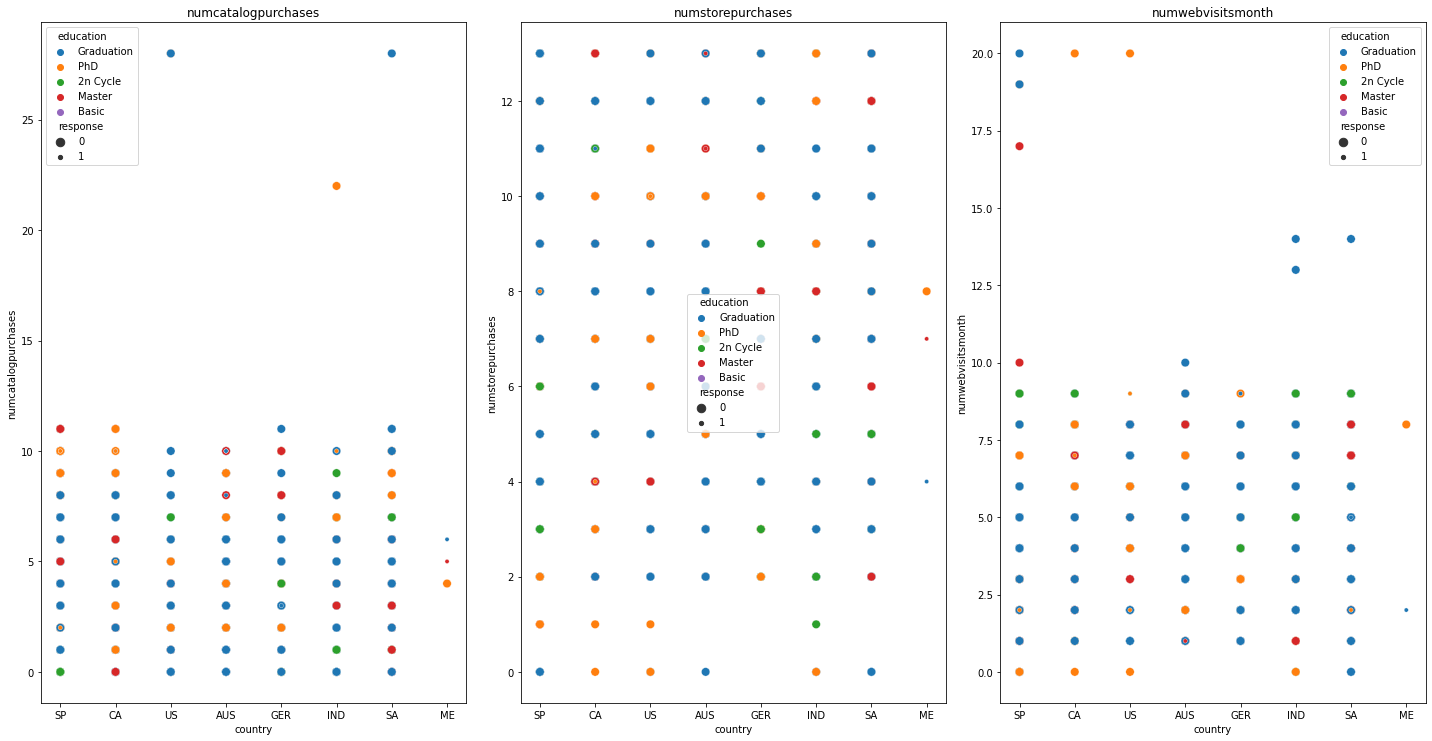

In [38]:
plt.figure(figsize=(20,20))
for i,j in enumerate(number.columns):
  ax=plt.subplot(2,3,i+1)
  sns.scatterplot(x='country',size='response',hue='education',y=j,data=data).set_title(j)
plt.tight_layout()  

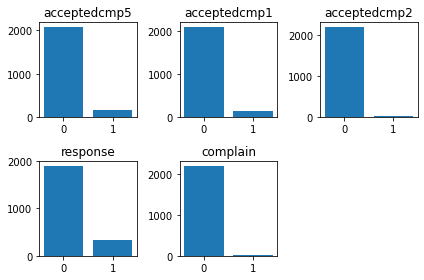

In [39]:
accepted=data.iloc[:,20:25]
for i,j in enumerate(accepted.columns):
  ax=plt.subplot(2,3,i+1)
  plt.bar(x=data[j].value_counts().index,height=data[j].value_counts().values)
  plt.title(j)
plt.tight_layout()  

**EDA**

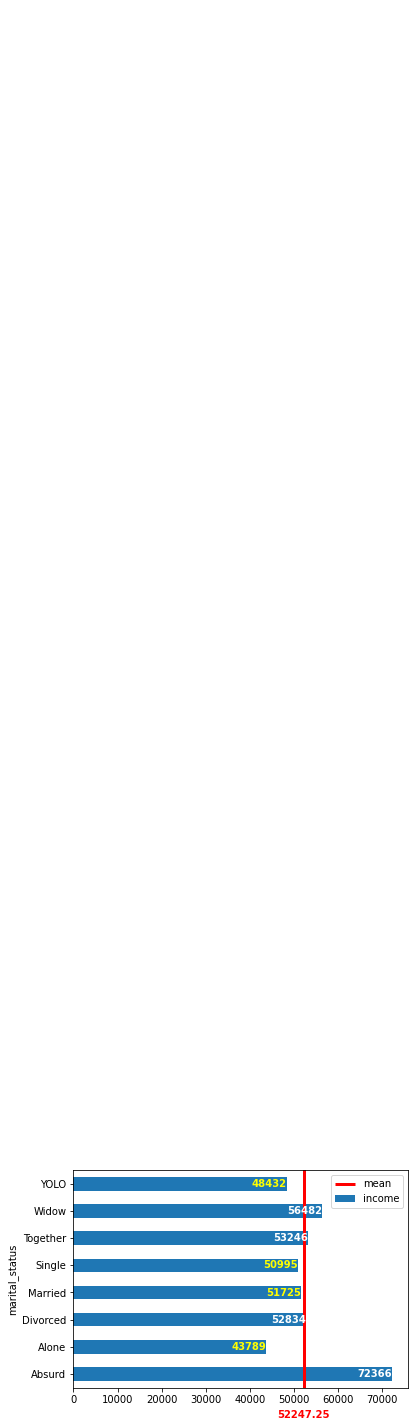

In [40]:
marital_income=data.groupby(['marital_status'])['income'].mean()
ax=marital_income.plot(kind='barh')
plt.vlines(x=data['income'].mean(),ymin=-1,ymax=10,color='red',lw=3,label='mean')
plt.text(x=data['income'].mean(),y=-1.5,s=round(data['income'].mean(),2),fontweight='bold',ha='center',va='center',color='red')
plt.legend()
plt.annotate('mean',xy=(data['income'].mean(),50),xycoords='data',xytext=(data['income'].mean()+10,50),arrowprops=dict(facecolor='k',shrink=0.04))
color=['yellow','white']
for p in ax.patches:
  if p.get_width()<data['income'].mean():
    color='yellow'
  else:
    color='white'
  ax.text(x=p.get_width(),y=p.get_y()+(p.get_height()/2),s='{:.0f}'.format(p.get_width()),color=color,fontweight='bold',ha='right',va='center')


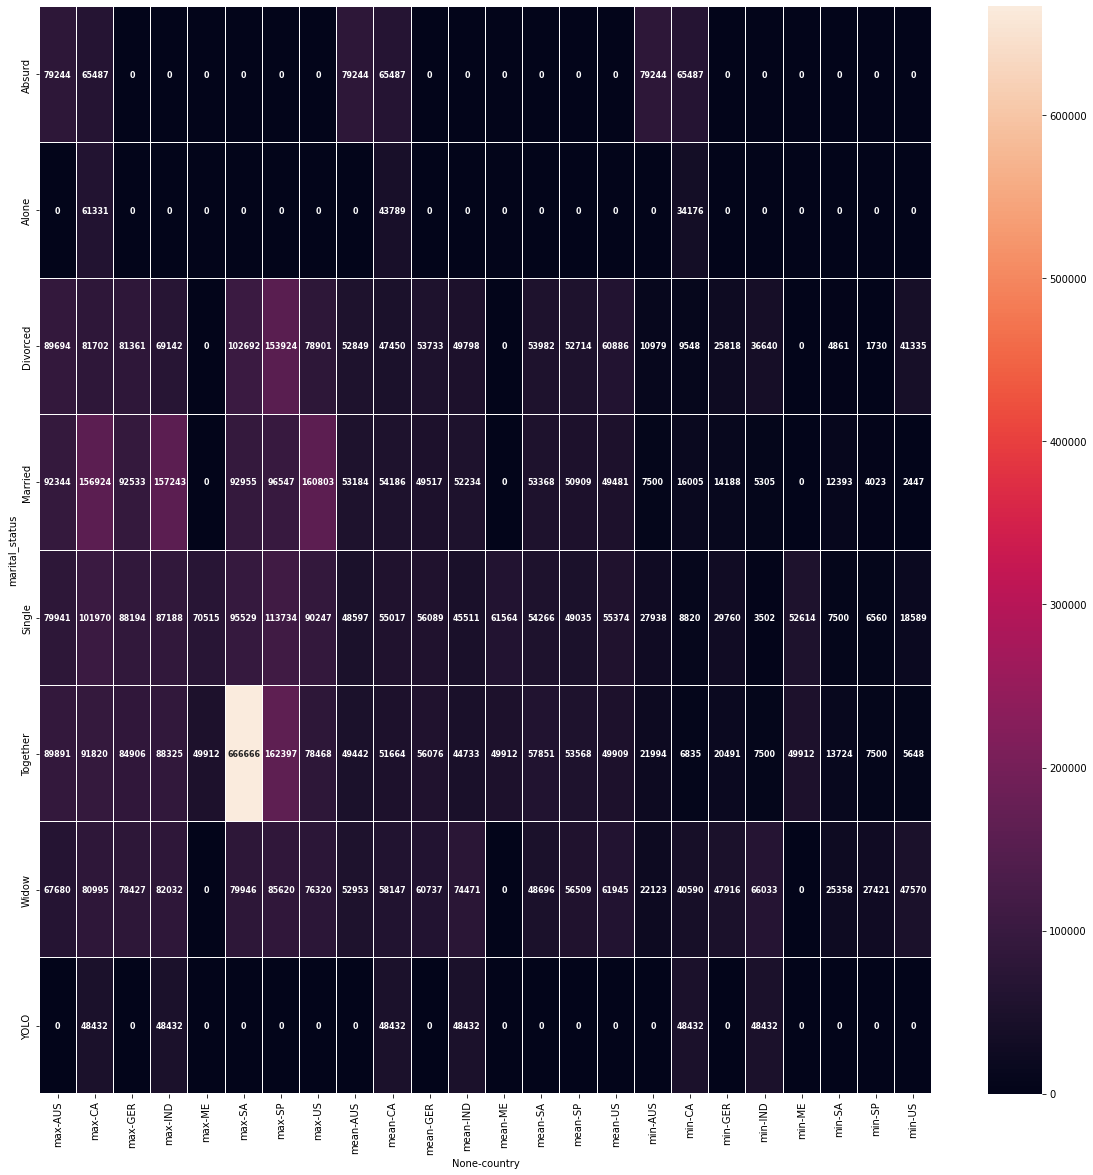

In [41]:
fig,ax=plt.subplots(figsize=(20,20))
mar_inc_coun=data.groupby(['marital_status','country']).agg({'income':[min,'mean',max]})
mar_pv=mar_inc_coun.pivot_table(values='income',index='marital_status',columns='country',aggfunc='mean',fill_value=0)
ax=sns.heatmap(mar_pv,annot=True,fmt='.0f',linewidths=0.05,annot_kws=dict(fontsize=8,ha='center',va='center',fontweight='bold'))

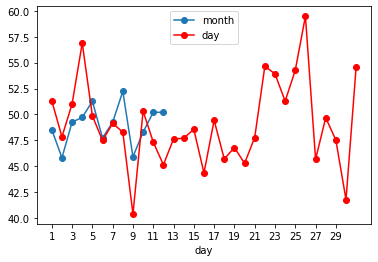

In [42]:
rece_dt_month=data.groupby('month')['recency'].mean().plot(marker='o',label='month')
rece_dt_day=data.groupby('day')['recency'].mean().plot(marker='o',color='red',label='day')
plt.xticks(ticks=range(1,30,2))
plt.legend(loc='upper center')

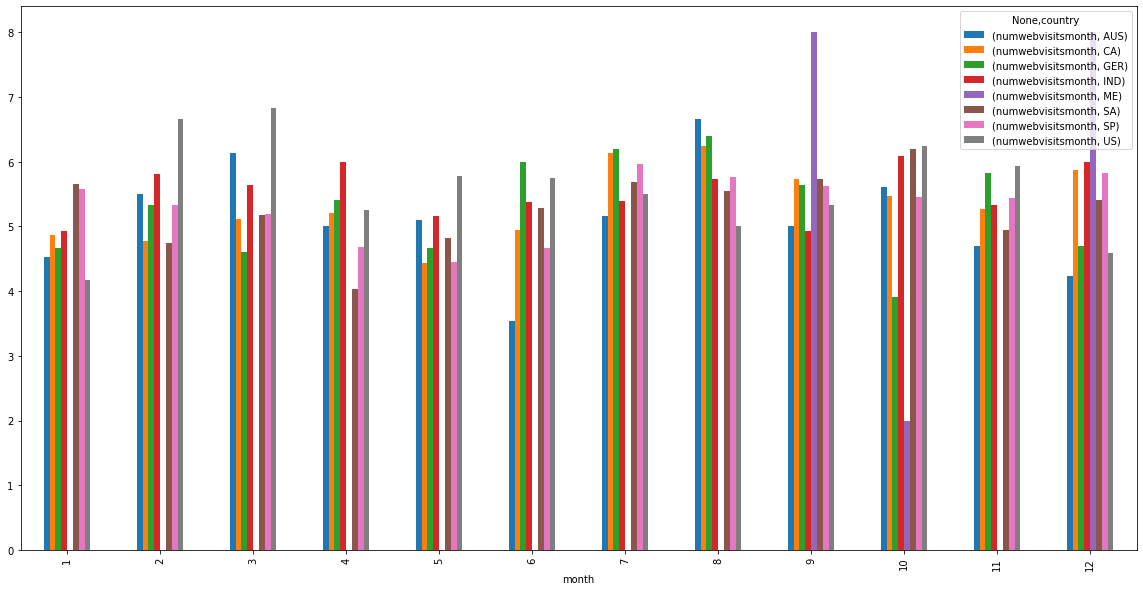

In [43]:
num_dt=data.groupby(['month','country']).agg({'numwebvisitsmonth':'mean'}).unstack()
fig,ax=plt.subplots(figsize=(20,10))
num_dt.plot(kind='bar',ax=ax)

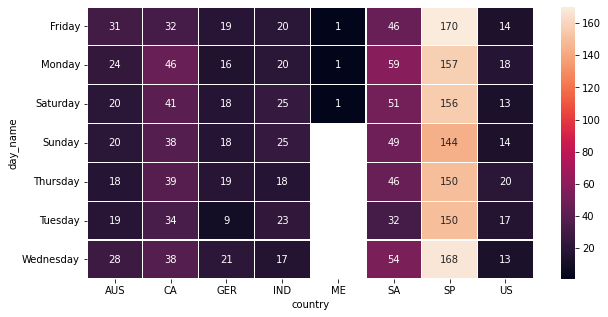

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
df=data.groupby(['day_name','country']).agg({'response':'count'})
df_pivot=pd.pivot_table(data=df,index='day_name',columns='country',values='response',aggfunc='sum')
sns.heatmap(df_pivot,annot=True,ax=ax,fmt='.0f',linewidths=0.2)



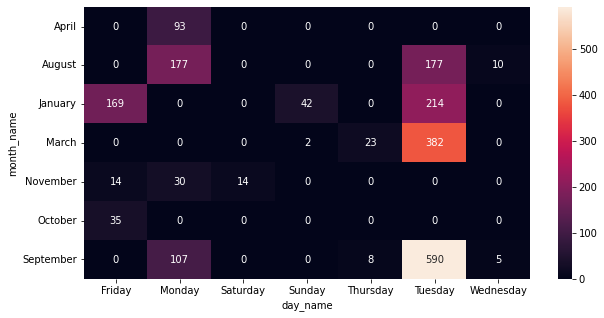

In [45]:
fig,ax=plt.subplots(figsize=(10,5))
dfp=data.groupby(['country','year','month_name','day_name','complain']).agg({'mntmeatproducts':'mean'}).reset_index()
dfp=dfp[dfp['complain']==1]
df_table=dfp.pivot_table(index='month_name',columns='day_name',values='mntmeatproducts',aggfunc='mean',fill_value=0)
sns.heatmap(df_table,annot=True,fmt='.0f',ax=ax)

modeling

In [46]:
condition=[(data['complain']==1)&(data['response']==1),(data['complain']==0)&(data['response']==0),(data['response']==1)&(data['complain']==0),(data['response']==0)&(data['complain']==1)]
deal=['Yes_answer','Nothing','No_answer','No_answer']
data['act']=np.select(condition,deal)
data['act'] # target variable

0       No_answer
1       No_answer
2         Nothing
3         Nothing
4       No_answer
          ...    
2235      Nothing
2236      Nothing
2237      Nothing
2238      Nothing
2239    No_answer
Name: act, Length: 2240, dtype: object

In [47]:
x=data.drop(['year_birth','act'],axis=1)
y=data['act']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.3)

In [48]:
x_test.shape,x_train.shape

((672, 30), (1568, 30))

In [49]:
y_test.shape,y_train.shape

((672,), (1568,))

In [50]:
pipe=Pipeline([('imputer',SimpleImputer()),('encoder',OneHotEncoder()),('scaller',MinMaxScaler()),('feature',SelectKBest()),('classify',SVC())])
param_grid={"imputer__strategy":['most_frequent','constant'],
            'encoder':[OneHotEncoder(sparse=False,handle_unknown='ignore'),LabelEncoder()], 
            'scaller':[StandardScaler(),MinMaxScaler()],'feature__k':[10,20,30,40],'feature__score_func':[f_classif],
            'classify':[SVC(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=1000),LogisticRegression()]}


In [ ]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=KFold(),scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)

In [52]:
print(grid.best_params_,2*'\n',grid.best_estimator_) # best setimator is SVC()

{'classify': SVC(), 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False), 'feature__k': 10, 'feature__score_func': <function f_classif at 0x7fd2e4509290>, 'imputer__strategy': 'most_frequent', 'scaller': StandardScaler()} 

 Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaller', StandardScaler()), ('feature', SelectKBest()),
                ('classify', SVC())])


In [54]:
model=grid.best_estimator_.fit(x_train,y_train)
pred=model.predict(x_test)


**accuracy**

In [55]:
report=accuracy_score(y_test,pred)
report

0.9985119047619048

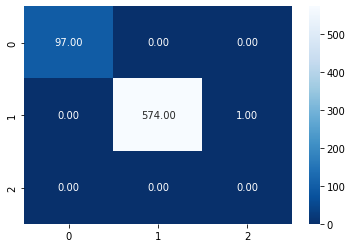

In [56]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2f',cmap='Blues_r')
